### Change of Mind
### 5b. MUA before and after turning around

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import spyglass as nd
import pandas as pd
import numpy as np
import xarray as xr
from scipy import stats
from scipy import linalg
import os
import pickle
import matplotlib.pyplot as plt
from ripple_detection.core import segment_boolean_series

from spyglass.common import (Session, IntervalList,LabMember, LabTeam, Raw, Session, Nwbfile,
                            Electrode,LFPBand,interval_list_intersect)
from spyglass.common import TaskEpoch
from spyglass.spikesorting.v0 import (SortGroup, 
                                    SpikeSortingRecording,SpikeSortingRecordingSelection)
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.common.common_position import IntervalPositionInfo, RawPosition, IntervalLinearizedPosition, TrackGraph

[2025-01-31 15:51:47,527][INFO]: Connecting shijiegu-alt@lmf-db.cin.ucsf.edu:3306
[2025-01-31 15:51:47,575][INFO]: Connected shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [131]:
from spyglass.shijiegu.Analysis_SGU import (TrialChoice,EpochPos,MUA,
        get_linearization_map,RippleTimes,RippleTimesWithDecode, NotExtendedTrialChoiceReplay)
from spyglass.shijiegu.decodeHelpers import runSessionNames
from spyglass.shijiegu.ripple_add_replay import plot_decode_spiking,select_subset_helper
from spyglass.shijiegu.changeOfMind import (find_turnaround_time, findProportion,
            find_trials, load_epoch_data_wrapper, find_direction, find_trials_animal)
from spyglass.shijiegu.changeOfMind_triggered import (turnaround_triggered_position, turnaround_triggered_decode,
            find_triggered_mua_session, find_triggered_mua_animal)
from spyglass.shijiegu.changeOfMindRipple import triggered_ripple_session,triggered_ripple_animal
from spyglass.shijiegu.load import load_decode

[13:48:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[13:48:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [ ]:
def nansum(a,b):
    if np.isnan(a) or np.isnan(b):
        return b
    else:
        return a + b
def stack_data(triggered_muas, bins = np.linspace(-1,1,100),speed = False):
    # stack all muas
    stacked_mua = np.zeros((len(triggered_muas),len(bins))) + np.nan
    
    for i in range(len(triggered_muas)):
        triggered_mua = triggered_muas[i]
    
        indices = np.digitize(triggered_mua.index, bins)
        for ind in range(len(triggered_mua)):
            if speed:
                stacked_mua[i,indices[ind]-1] = nansum(stacked_mua[i,indices[ind]-1], np.array(triggered_mua.head_speed)[ind])
            else:
                stacked_mua[i,indices[ind]-1] = nansum(stacked_mua[i,indices[ind]-1], np.array(triggered_mua)[ind])
    return stacked_mua

In [132]:
delta_t_minus = 1
delta_t_plus = 1
proportion_threshold = 0.1
nearby = False

In [133]:
(triggered_mua,triggered_positioninfo,triggered_day_session_trial) = ({},{},{})

In [229]:
animal = 'Eliot'
list_of_days = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']

(triggered_mua[animal],
 triggered_positioninfo[animal],
 triggered_day_session_trial[animal]) = find_triggered_mua_animal(
                animal,list_of_days,
                proportion_threshold = proportion_threshold,
                delta_t_minus = delta_t_minus, delta_t_plus = delta_t_plus,
                nearby = False)

animal = 'Lewis'
list_of_days = ['20240104','20240105','20240106','20240107','20240108','20240109', #['20240102','20240103','20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114']
(triggered_mua[animal],
 triggered_positioninfo[animal],
 triggered_day_session_trial[animal]) = find_triggered_mua_animal(
                animal,list_of_days,
                proportion_threshold = proportion_threshold,
                delta_t_minus = delta_t_minus, delta_t_plus = delta_t_plus,
                nearby = False)

animal = 'Haydn'
list_of_days = ['20230604','20230605','20230606','20230607','20230608']
(triggered_mua[animal],
 triggered_positioninfo[animal],
 triggered_day_session_trial[animal]) = find_triggered_mua_animal(
                animal,list_of_days,
                proportion_threshold = proportion_threshold,
                delta_t_minus = delta_t_minus, delta_t_plus = delta_t_plus,
                nearby = False)

[14:58:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:58:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:58:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times
currently investigating:
05_Seq2Session3
pos 4 valid times


[14:58:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
07_Seq2Session4
pos 6 valid times


[14:58:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
09_Seq2Session5
pos 8 valid times


[14:58:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
11_Seq2Session6
pos 10 valid times


[14:58:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:58:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:58:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:58:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:58:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[14:58:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:58:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:58:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:58:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:58:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[14:58:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[14:58:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:58:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:58:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:58:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:58:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:58:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:58:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:58:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:58:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[14:58:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:58:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:58:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:58:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:58:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session2
pos 1 valid times


[14:58:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session3
pos 3 valid times


[14:59:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session4
pos 5 valid times


[14:59:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session5
pos 7 valid times


[14:59:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session6
pos 9 valid times


[14:59:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:59:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:59:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:59:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:59:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:59:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:59:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:59:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:59:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[14:59:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[14:59:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:59:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:59:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[14:59:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[14:59:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[14:59:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:59:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:59:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:00:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:00:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:00:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:00:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:00:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:00:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[15:00:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:00:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:00:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:00:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:00:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:00:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:00:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:01:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:01:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:01:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:01:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:01:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:01:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[15:01:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:01:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:01:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:01:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:01:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:01:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:02:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:02:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


In [243]:
animal = 'Haydn'
dates_to_plot = ['20230604']
(triggered_mua[animal],
 triggered_positioninfo[animal],
 triggered_day_session_trial[animal]) = find_triggered_mua_animal(
                animal,dates_to_plot,
                proportion_threshold = 0.1,
                delta_t_minus = delta_t_minus, delta_t_plus = delta_t_plus,
                nearby = False)

[15:07:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[15:07:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[15:07:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[15:08:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[15:08:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


In [230]:
animal = "Eliot"

Text(0, 0.5, '(cm/s)')

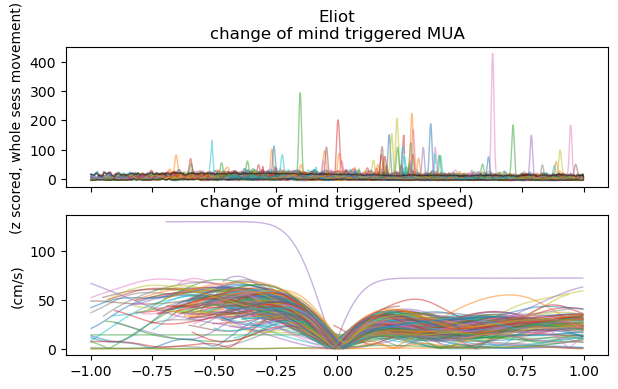

In [231]:
bins = np.linspace(-1,1,1000)
stacked_mua = stack_data(triggered_mua[animal], bins = bins)
stacked_speed = stack_data(triggered_positioninfo[animal], bins = bins, speed = True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 4),sharex=True)

for i in range(len(triggered_mua[animal])):
    ax1.plot(bins[1:-2], stacked_mua[i,:][1:-2],linewidth = 1, alpha = 0.5)
    ax2.plot(bins[1:-2], stacked_speed[i][1:-2],linewidth = 1, alpha = 0.5)
# remove edges due to edge effect

ax1.plot(bins, np.nanquantile(stacked_mua, 0.05,axis = 0), color = "k", linewidth = 1, alpha = 0.5)
ax1.plot(bins, np.nanquantile(stacked_mua, 0.95,axis = 0), color = "k", linewidth = 1, alpha = 0.5)
ax1.set_title(animal + "\nchange of mind triggered MUA")
ax2.set_title("change of mind triggered speed)")
ax1.set_ylabel("(z scored, whole sess movement)")
ax2.set_ylabel("(cm/s)")

#ax1.set_ylim([-5,30])

In [232]:
animal = "Lewis"

Text(0, 0.5, '(cm/s)')

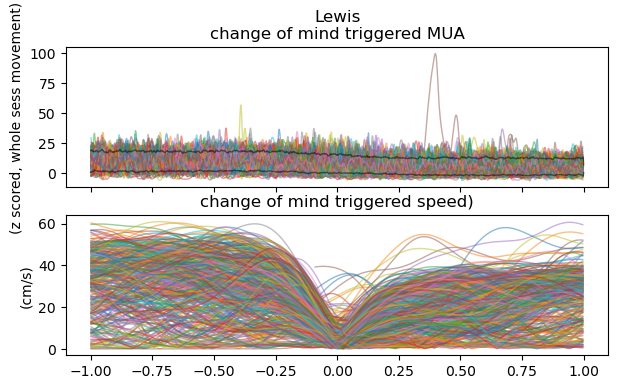

In [233]:
bins = np.linspace(-1,1,1000)
stacked_mua = stack_data(triggered_mua[animal], bins = bins)
stacked_speed = stack_data(triggered_positioninfo[animal], bins = bins, speed = True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 4),sharex=True)

for i in range(len(triggered_mua[animal])):
    ax1.plot(bins[1:-2], stacked_mua[i,:][1:-2],linewidth = 1, alpha = 0.5)
    ax2.plot(bins[1:-2], stacked_speed[i][1:-2],linewidth = 1, alpha = 0.5)
# remove edges due to edge effect

ax1.plot(bins, np.nanquantile(stacked_mua, 0.05,axis = 0), color = "k", linewidth = 1, alpha = 0.5)
ax1.plot(bins, np.nanquantile(stacked_mua, 0.95,axis = 0), color = "k", linewidth = 1, alpha = 0.5)
ax1.set_title(animal + "\nchange of mind triggered MUA")
ax2.set_title("change of mind triggered speed)")
ax1.set_ylabel("(z scored, whole sess movement)")
ax2.set_ylabel("(cm/s)")
#ax1.set_ylim([-5,30])

In [244]:
animal = "Haydn"

Text(0, 0.5, '(cm/s)')

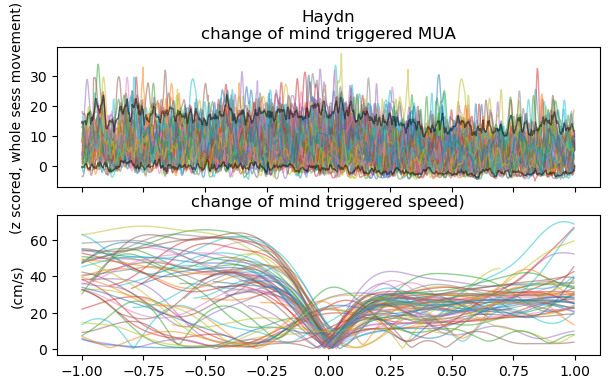

In [245]:
bins = np.linspace(-1,1,1000)
stacked_mua = stack_data(triggered_mua[animal], bins = bins)
stacked_speed = stack_data(triggered_positioninfo[animal], bins = bins, speed = True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 4),sharex=True)

for i in range(len(triggered_mua[animal])):
    ax1.plot(bins[1:-2], stacked_mua[i,:][1:-2],linewidth = 1, alpha = 0.5)
    ax2.plot(bins[1:-2], stacked_speed[i][1:-2],linewidth = 1, alpha = 0.5)
# remove edges due to edge effect

ax1.plot(bins, np.nanquantile(stacked_mua, 0.05,axis = 0), color = "k", linewidth = 1, alpha = 0.5)
ax1.plot(bins, np.nanquantile(stacked_mua, 0.95,axis = 0), color = "k", linewidth = 1, alpha = 0.5)
ax1.set_title(animal + "\nchange of mind triggered MUA")
ax2.set_title("change of mind triggered speed)")
ax1.set_ylabel("(z scored, whole sess movement)")
ax2.set_ylabel("(cm/s)")

#ax1.set_ylim([-5,30])

### End here

In [440]:
ranges, ripple_ind, session_names, ranges_nearby, ripple_ind_nearby, session_names_nearby = ({}, {}, {}, {}, {}, {})

#######
animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221017','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
    
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_0SD'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal]) = triggered_ripple_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh, post = False)

#######
animal = 'Lewis'
dates_to_plot = ['20240104','20240105','20240106','20240107','20240108','20240109', #['20240102','20240103','20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114']#'20240115','20240116','20240117','20240118','20240119','20240120']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_M05SD'
(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal]) = triggered_ripple_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh, post = False)

#######
animal = 'Haydn'
dates_to_plot = ['20230604','20230605','20230606','20230607','20230608']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_0SD'
(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal]) = triggered_ripple_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh, post = False)

[14:12:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:12:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 0
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:12:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 1
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:12:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 4
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:12:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:12:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 6
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:12:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 14
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:12:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 10
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:12:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 12
currently investigating:
10_Seq2Session5
pos 9 valid times


[14:12:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 5
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:12:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 6
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:12:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 9
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:12:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 9
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:12:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 4
currently investigating:
10_Seq2Session5
pos 9 valid times


[14:12:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 9
currently investigating:
12_Seq2Session6
pos 11 valid times


[14:13:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Seq2Session6 8
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:13:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 11
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:13:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 9
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:13:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 9
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:13:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 7
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:13:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 9
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:13:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 7
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:13:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 5
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:13:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 6
currently investigating:
10_Seq2Session5
pos 9 valid times


[14:13:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 3
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:13:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 1
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:13:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 3
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:13:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 5
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:13:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session2
pos 1 valid times


[14:13:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session2 3
currently investigating:
04_Seq2Session3
pos 3 valid times


[14:13:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session3 2
currently investigating:
06_Seq2Session4
pos 5 valid times


[14:13:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session4 5
currently investigating:
08_Seq2Session5
pos 7 valid times


[14:13:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session5 4
currently investigating:
10_Seq2Session6
pos 9 valid times


[14:13:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session6 6
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:13:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 10
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:13:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 0
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:13:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 2
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:13:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:13:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 3
currently investigating:
04_Seq2Session2
pos 3 valid times


[14:13:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 3
currently investigating:
06_Seq2Session3
pos 5 valid times


[14:13:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 3
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:13:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
10_Seq2Session5
pos 9 valid times


[14:13:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 2
currently investigating:
12_Seq2Session6
pos 11 valid times


[14:13:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Seq2Session6 0
currently investigating:
02_Rev2Session1
pos 1 valid times
02_Rev2Session1 17


[14:13:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 15
currently investigating:
06_Rev2Session3
pos 5 valid times
06_Rev2Session3 19


[14:13:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 6
currently investigating:
10_Rev2Session5
pos 9 valid times


[14:13:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 1
currently investigating:
02_Rev2Session1
pos 1 valid times


[14:13:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 8
currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 12
currently investigating:
06_Rev2Session3
pos 5 valid times


[14:13:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 5
currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[14:13:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 10
currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 8
currently investigating:
06_Rev2Session3
pos 5 valid times


[14:13:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 11
currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 7
currently investigating:
10_Rev2Session5
pos 9 valid times


[14:13:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[14:13:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 9
currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 19
currently investigating:
06_Rev2Session3
pos 5 valid times


[14:13:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 9
currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 10
currently investigating:
02_Rev2Session1
pos 1 valid times


[14:13:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 10
currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 14
currently investigating:
06_Rev2Session3
pos 5 valid times


[14:13:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 9
currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 5
currently investigating:
02_Rev2Session1
pos 1 valid times


[14:13:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 13
currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 15
currently investigating:
06_Rev2Session3
pos 5 valid times


[14:13:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 10
currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 2
currently investigating:
10_Rev2Session5
pos 9 valid times


[14:13:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[14:13:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 20
currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 16
currently investigating:
06_Rev2Session3
pos 5 valid times


[14:13:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 10
currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 10
currently investigating:
02_Rev2Session1
pos 1 valid times


[14:13:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 20
currently investigating:
04_Rev2Session2
pos 3 valid times


[14:13:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 20
currently investigating:
06_Rev2Session3
pos 5 valid times


[14:13:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 22
currently investigating:
08_Rev2Session4
pos 7 valid times


[14:13:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 2
currently investigating:
02_Rev3Session1
pos 1 valid times


DataJointError: fetch1 should only return one tuple. 0 tuples found

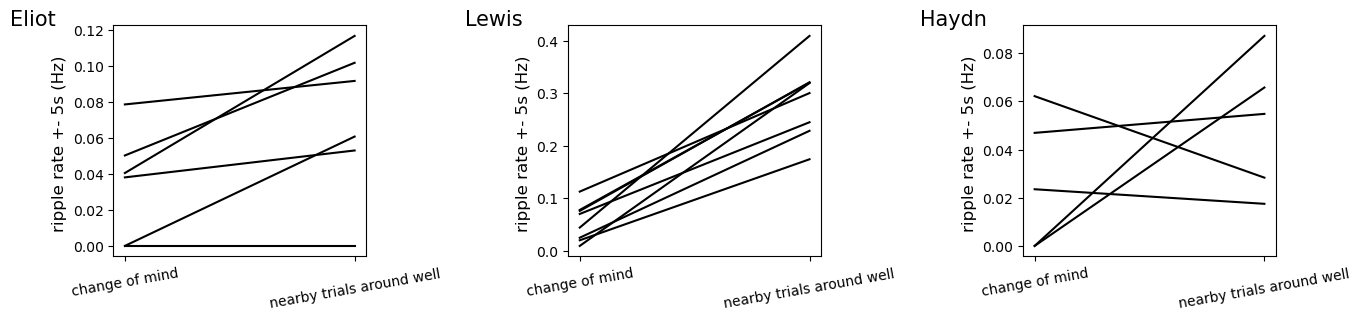

In [444]:
animals = list(ranges.keys())
fig,axes = plt.subplots(1,len(animals),figsize = (5*len(animals),3))
plt.subplots_adjust(wspace=0.8, hspace=0.5)

row_ind = 0
for animal in animals:
    
    for d in ranges[animal].keys():
        if len(ranges[animal][d]) < 10:
            # no data that day
            continue
        total_time = np.sum(np.diff(ranges[animal][d],axis = 1))
        rate = len(ripple_ind[animal][d]) / total_time
    
        total_time_nearby = np.sum(np.diff(ranges_nearby[animal][d],axis = 1))
        rate_nearby = len(ripple_ind_nearby[animal][d]) / total_time_nearby
    
        axes[row_ind].plot([1,2],[rate,rate_nearby],color = 'k')
        
    axes[row_ind].set_xticks([1,2])
    axes[row_ind].set_xticklabels(['change of mind','nearby trials around well'],rotation = 10)
    axes[row_ind].set_ylabel('ripple rate +- 5s (Hz) ',fontsize = 12)
    #

    axes[row_ind].text(0.5,axes[row_ind].get_ylim()[1],animal,fontsize = 15)
    
    row_ind += 1

### 2. replay after the final well poke on change of mind trials

In [465]:
ranges, ripple_ind, session_names, ranges_nearby, ripple_ind_nearby, session_names_nearby = ({}, {}, {}, {}, {}, {})

#######
animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221017','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
    
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_0SD'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal]) = triggered_ripple_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh, post = True)

#######
animal = 'Lewis'
dates_to_plot = ['20240104','20240105','20240106','20240107','20240108','20240109', #['20240102','20240103','20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114']#'20240115','20240116','20240117','20240118','20240119','20240120']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_M05SD'
(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal]) = triggered_ripple_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh, post = True)

#######
animal = 'Haydn'
dates_to_plot = ['20230604','20230605','20230606','20230607','20230608']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_0SD'
(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal]) = triggered_ripple_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh, post = True)

[11:32:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 0
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 1
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 4
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 6
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 14
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 10
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 12
currently investigating:
10_Seq2Session5
pos 9 valid times


[11:32:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 5
currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 6
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 9
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 9
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 4
currently investigating:
10_Seq2Session5
pos 9 valid times


[11:32:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 9
currently investigating:
12_Seq2Session6
pos 11 valid times


[11:32:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Seq2Session6 8
currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 11
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 9
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 9
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 7
currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 9
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 7
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 5
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 6
currently investigating:
10_Seq2Session5
pos 9 valid times


[11:32:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 3
currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 1
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 3
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 5
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session2
pos 1 valid times


[11:32:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session2 3
currently investigating:
04_Seq2Session3
pos 3 valid times


[11:32:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session3 2
currently investigating:
06_Seq2Session4
pos 5 valid times


[11:32:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session4 5
currently investigating:
08_Seq2Session5
pos 7 valid times


[11:32:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session5 4
currently investigating:
10_Seq2Session6
pos 9 valid times


[11:32:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session6 6
currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 10
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 0
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 2
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session1
pos 1 valid times


[11:32:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 3
currently investigating:
04_Seq2Session2
pos 3 valid times


[11:32:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 3
currently investigating:
06_Seq2Session3
pos 5 valid times


[11:32:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 3
currently investigating:
08_Seq2Session4
pos 7 valid times


[11:32:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
10_Seq2Session5
pos 9 valid times


[11:32:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 2
currently investigating:
12_Seq2Session6
pos 11 valid times


[11:32:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Seq2Session6 0
currently investigating:
02_Rev2Session1
pos 1 valid times
02_Rev2Session1 17


[11:32:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 15
currently investigating:
06_Rev2Session3
pos 5 valid times
06_Rev2Session3 19


[11:32:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 6
currently investigating:
10_Rev2Session5
pos 9 valid times


[11:32:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 1
currently investigating:
02_Rev2Session1
pos 1 valid times


[11:32:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 8
currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 12
currently investigating:
06_Rev2Session3
pos 5 valid times


[11:32:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 5
currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[11:32:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 10
currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 8
currently investigating:
06_Rev2Session3
pos 5 valid times


[11:32:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 11
currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 7
currently investigating:
10_Rev2Session5
pos 9 valid times


[11:32:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[11:32:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 9
currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 19
currently investigating:
06_Rev2Session3
pos 5 valid times


[11:32:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 9
currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 10
currently investigating:
02_Rev2Session1
pos 1 valid times


[11:32:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 10
currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 14
currently investigating:
06_Rev2Session3
pos 5 valid times


[11:32:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 9
currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 5
currently investigating:
02_Rev2Session1
pos 1 valid times


[11:32:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 13
currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 15
currently investigating:
06_Rev2Session3
pos 5 valid times


[11:32:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 10
currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 2
currently investigating:
10_Rev2Session5
pos 9 valid times


[11:32:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[11:32:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 20
currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 16
currently investigating:
06_Rev2Session3
pos 5 valid times


[11:32:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 10
currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 10
currently investigating:
02_Rev2Session1
pos 1 valid times


[11:32:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 20
currently investigating:
04_Rev2Session2
pos 3 valid times


[11:32:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 20
currently investigating:
06_Rev2Session3
pos 5 valid times
06_Rev2Session3 22


[11:32:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[11:32:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 2
currently investigating:
02_Rev3Session1
pos 1 valid times


[11:33:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 14
currently investigating:
04_Rev3Session2
pos 3 valid times


[11:33:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 11
currently investigating:
06_Rev3Session3
pos 5 valid times


[11:33:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 11
currently investigating:
08_Rev3Session4
pos 7 valid times


[11:33:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 10
currently investigating:
10_Rev3Session5
pos 9 valid times


[11:33:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev3Session5 7
currently investigating:
02_Rev3Session1
pos 1 valid times


[11:33:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 14
currently investigating:
04_Rev3Session2
pos 3 valid times


[11:33:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 9
currently investigating:
06_Rev3Session3
pos 5 valid times


[11:33:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 6
currently investigating:
08_Rev3Session4
pos 7 valid times


[11:33:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 6
currently investigating:
10_Rev3Session5
pos 9 valid times


[11:33:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev3Session5 8
currently investigating:
12_Rev3Session6
pos 11 valid times


[11:33:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Rev3Session6 2
currently investigating:
02_Rev3Session1
pos 1 valid times


[11:33:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 7
currently investigating:
04_Rev3Session2
pos 3 valid times


[11:33:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 8
currently investigating:
06_Rev3Session3
pos 5 valid times


[11:33:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 8
currently investigating:
08_Rev3Session4
pos 7 valid times


[11:33:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 4
currently investigating:
10_Rev3Session5
pos 9 valid times


[11:33:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev3Session5 13
currently investigating:
02_Rev3Session1
pos 1 valid times


[11:33:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 6
currently investigating:
04_Rev3Session2
pos 3 valid times


[11:33:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 4
currently investigating:
06_Rev3Session3
pos 5 valid times


[11:33:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 6
currently investigating:
08_Rev3Session4
pos 7 valid times


[11:33:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 0
currently investigating:
11_Rev3Session5
pos 10 valid times


[11:33:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


11_Rev3Session5 7
currently investigating:
02_Rev3Session1
pos 1 valid times


[11:33:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 5
currently investigating:
04_Rev3Session2
pos 3 valid times


[11:33:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 6
currently investigating:
06_Rev3Session3
pos 5 valid times


[11:33:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 13
currently investigating:
08_Rev3Session4
pos 7 valid times


[11:33:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 13
currently investigating:
10_Rev3Session5
pos 9 valid times
10_Rev3Session5 10


In [526]:
def plot_ripple_rate(ranges,ranges_nearby,ripple_ind,ripple_ind_nearby):
    animals = list(ranges.keys())
    fig,axes = plt.subplots(1,len(animals),figsize = (5*len(animals),3))
    plt.subplots_adjust(wspace=0.8, hspace=0.5)
    
    row_ind = 0
    for animal in animals:
        
        for d in ranges[animal].keys():
            if len(ripple_ind[animal][d]) < 5:
                # no data that day
                continue
            total_time = np.sum(np.diff(ranges[animal][d],axis = 1))
            rate = len(ripple_ind[animal][d]) / total_time
        
            total_time_nearby = np.sum(np.diff(ranges_nearby[animal][d],axis = 1))
            rate_nearby = len(ripple_ind_nearby[animal][d]) / total_time_nearby
        
            axes[row_ind].plot([1,2],[rate,rate_nearby],color = 'k')
            
        axes[row_ind].set_xticks([1,2])
        axes[row_ind].set_xticklabels(['change of mind','nearby trials around well'],rotation = 10)
        axes[row_ind].set_ylabel('ripple rate +- 5s (Hz) ',fontsize = 12)
        axes[row_ind].set_title('post poke')
        #
    
        axes[row_ind].text(0.5,axes[row_ind].get_ylim()[1],animal,fontsize = 15)
        
        row_ind += 1

In [527]:
def plot_fragmented_ratio(ranges,ranges_nearby,ripple_ind,ripple_ind_nearby,session_names,session_names_nearby):
    animals = list(ranges.keys())
    fig,axes = plt.subplots(1,len(animals),figsize = (5*len(animals),3))
    plt.subplots_adjust(wspace=0.8, hspace=0.5)
    
    row_ind = 0
    nwb_name_old = ""
    session_name_old = ""
    for animal in animals:
        if animal == "Lewis":
            decode_thresh = 'MUA_M05SD'
        else:
            decode_thresh = 'MUA_0SD'
        
        for d in ranges[animal].keys():
            if len(ripple_ind[animal][d]) < 5:
                # no data that day
                continue
    
            # load ripple times
            total_time_frag = 0
            total_time_cont = 0
            for ind in range(len(ripple_ind[animal][d])):
                ripple_id = ripple_ind[animal][d][ind]
                (nwb_copy_file_name, session_name)  = session_names[animal][d][ind]
                
                # load ripple
                if session_name_old != session_name:
                    key = {"nwb_file_name": nwb_copy_file_name, "interval_list_name":session_name,"decode_threshold_method":decode_thresh}
                    ripple_times_query = (RippleTimesWithDecode() & key).fetch1("ripple_times")
    
                    if type(ripple_times_query) is dict:
                        ripple_times = pd.DataFrame(ripple_times_query)
                    else:
                        ripple_times = pd.read_pickle(ripple_times_query)
                    session_name_old = session_name
                    nwb_name_old = nwb_copy_file_name
                    
                frag_intvl = ripple_times.loc[ripple_id,"frag_intvl"]
                cont_intvl = ripple_times.loc[ripple_id,"cont_intvl"]
                if len(frag_intvl) > 0:
                    total_time_frag = total_time_frag + frag_intvl.shape[0] #np.sum(np.diff(frag_intvl, axis = 1))
                if len(cont_intvl) > 0:
                    total_time_cont = total_time_cont + cont_intvl.shape[0] #+ np.sum(np.diff(cont_intvl, axis = 1))
                
            total_time = np.sum(np.diff(ranges[animal][d],axis = 1))
            rate = total_time_frag / (total_time_cont + total_time_frag)#total_time_frag #/ total_time
    
            total_time_frag_nearby = 0
            total_time_cont_nearby = 0
            for ind in range(len(ripple_ind_nearby[animal][d])):
                ripple_id = ripple_ind_nearby[animal][d][ind]
                (nwb_copy_file_name, session_name)  = session_names_nearby[animal][d][ind]
                
                # load ripple
                if session_name_old != session_name:
                    key = {"nwb_file_name": nwb_copy_file_name, "interval_list_name":session_name,"decode_threshold_method":decode_thresh}
                    ripple_times_query = (RippleTimesWithDecode() & key).fetch1("ripple_times")
    
                    if type(ripple_times_query) is dict:
                        ripple_times = pd.DataFrame(ripple_times_query)
                    else:
                        ripple_times = pd.read_pickle(ripple_times_query)
                    session_name_old = session_name
                    nwb_name_old = nwb_copy_file_name
                    
                frag_intvl = ripple_times.loc[ripple_id,"frag_intvl"]
                cont_intvl = ripple_times.loc[ripple_id,"cont_intvl"]
                
                if len(frag_intvl) > 0:
                    total_time_frag_nearby = total_time_frag_nearby + frag_intvl.shape[0]#np.sum(np.diff(frag_intvl, axis = 1))
                if len(cont_intvl) > 0:
                    total_time_cont_nearby = total_time_cont_nearby + cont_intvl.shape[0] #np.sum(np.diff(cont_intvl, axis = 1))
                    #frag_intvl.shape[0]#np.sum(np.diff(frag_intvl, axis = 1))
                    
            total_time_nearby = np.sum(np.diff(ranges_nearby[animal][d],axis = 1))
            rate_nearby = total_time_frag_nearby / (total_time_cont_nearby + total_time_frag_nearby) #total_time_frag_nearby #/ total_time_nearby
        
            axes[row_ind].plot([1,2],[rate,rate_nearby],color = 'k')
            
        axes[row_ind].set_xticks([1,2])
        axes[row_ind].set_xticklabels(['change of mind','nearby trials around well'],rotation = 10)
        axes[row_ind].set_ylabel('frgmnted ctnuous ratio',fontsize = 12)
        axes[row_ind].set_title('post')
        #
    
        axes[row_ind].text(0.5,axes[row_ind].get_ylim()[1],animal,fontsize = 15)
        
        row_ind += 1

### Further, we restrict to trials where extended replays happen.

In [507]:
from spyglass.shijiegu.changeOfMind_triggered import (find_triggered_animal,
    find_large_position_minus_decode_trials,
    trials_date_session_to_dict,
    triggered_ripple_counterfactual_animal)

In [508]:
ranges, ripple_ind, session_names, ranges_nearby, ripple_ind_nearby, session_names_nearby = ({}, {}, {}, {}, {}, {})

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221017','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
    
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_0SD'

(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal])  = triggered_ripple_counterfactual_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh)

#######
animal = 'Lewis'
dates_to_plot = ['20240104','20240105','20240106','20240107','20240108','20240109', #['20240102','20240103','20240104','20240105','20240106','20240107','20240108','20240109',
                 '20240110','20240113','20240114']#'20240115','20240116','20240117','20240118','20240119','20240120']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_M05SD'
(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal])  = triggered_ripple_counterfactual_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh)

#######
animal = 'Haydn'
dates_to_plot = ['20230604','20230605','20230606','20230607','20230608']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_thresh = 'MUA_0SD'
(ranges[animal], ripple_ind[animal], session_names[animal],
    ranges_nearby[animal], ripple_ind_nearby[animal], session_names_nearby[animal])  = triggered_ripple_counterfactual_animal(
    animal, dates_to_plot, encoding_set, classifier_param_name, decode_thresh)

[13:06:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:06:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:06:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[13:06:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:06:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session2
pos 1 valid times


[13:06:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session3
pos 3 valid times


[13:06:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session4
pos 5 valid times


[13:06:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session5
pos 7 valid times


[13:06:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session6
pos 9 valid times


[13:06:34][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Seq2Session5
pos 9 valid times


[13:06:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Seq2Session6
pos 11 valid times


[13:06:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 0
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 1
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 4
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 6
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 14
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 10
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 12
currently investigating:
10_Seq2Session5
pos 9 valid times


[13:06:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 5
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 6
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 9
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 9
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 4
currently investigating:
10_Seq2Session5
pos 9 valid times


[13:06:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 9
currently investigating:
12_Seq2Session6
pos 11 valid times


[13:06:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Seq2Session6 8
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 11
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 9
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 9
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 7
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 9
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 7
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 5
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 6
currently investigating:
10_Seq2Session5
pos 9 valid times


[13:06:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 3
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:06:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 1
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:06:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 3
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:06:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 5
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:06:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session2
pos 1 valid times


[13:06:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session2 3
currently investigating:
04_Seq2Session3
pos 3 valid times


[13:06:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session3 2
currently investigating:
06_Seq2Session4
pos 5 valid times


[13:07:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session4 5
currently investigating:
08_Seq2Session5
pos 7 valid times


[13:07:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session5 4
currently investigating:
10_Seq2Session6
pos 9 valid times


[13:07:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session6 6
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:07:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 10
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:07:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 0
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:07:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 2
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:07:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
02_Seq2Session1
pos 1 valid times


[13:07:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Seq2Session1 3
currently investigating:
04_Seq2Session2
pos 3 valid times


[13:07:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Seq2Session2 3
currently investigating:
06_Seq2Session3
pos 5 valid times


[13:07:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Seq2Session3 3
currently investigating:
08_Seq2Session4
pos 7 valid times


[13:07:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Seq2Session4 2
currently investigating:
10_Seq2Session5
pos 9 valid times


[13:07:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Seq2Session5 2
currently investigating:
12_Seq2Session6
pos 11 valid times


[13:07:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Seq2Session6 0
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:07:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:07:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[13:07:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 17
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 15
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 19
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 6
currently investigating:
10_Rev2Session5
pos 9 valid times


[13:07:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 1
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 8
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 12
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 5
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 10
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 8
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:07:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 11
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:07:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 7
currently investigating:
10_Rev2Session5
pos 9 valid times


[13:07:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:07:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 9
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:07:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 19
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:08:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 9
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:08:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 10
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:08:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 10
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:08:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 14
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:08:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 9
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:08:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 5
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:08:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 13
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:08:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 15
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:08:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 10
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:08:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 2
currently investigating:
10_Rev2Session5
pos 9 valid times


[13:08:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev2Session5 4
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:08:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 20
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:08:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 16
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:08:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 10
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:08:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 10
currently investigating:
02_Rev2Session1
pos 1 valid times


[13:08:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev2Session1 20
currently investigating:
04_Rev2Session2
pos 3 valid times


[13:08:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev2Session2 20
currently investigating:
06_Rev2Session3
pos 5 valid times


[13:08:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev2Session3 22
currently investigating:
08_Rev2Session4
pos 7 valid times


[13:08:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev2Session4 2
currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:08:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:08:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
12_Rev3Session6
pos 11 valid times


[13:08:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:08:28][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:29][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:31][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
11_Rev3Session5
pos 10 valid times


[13:08:32][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[13:08:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 14
currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 11
currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 11
currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 10
currently investigating:
10_Rev3Session5
pos 9 valid times


[13:08:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev3Session5 7
currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 14
currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 9
currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 6
currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 6
currently investigating:
10_Rev3Session5
pos 9 valid times


[13:08:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev3Session5 8
currently investigating:
12_Rev3Session6
pos 11 valid times


[13:08:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


12_Rev3Session6 2
currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 7
currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 8
currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 8
currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 4
currently investigating:
10_Rev3Session5
pos 9 valid times


[13:08:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


10_Rev3Session5 13
currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 6
currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 4
currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 6
currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 0
currently investigating:
11_Rev3Session5
pos 10 valid times


[13:08:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


11_Rev3Session5 7
currently investigating:
02_Rev3Session1
pos 1 valid times


[13:08:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


02_Rev3Session1 5
currently investigating:
04_Rev3Session2
pos 3 valid times


[13:08:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


04_Rev3Session2 6
currently investigating:
06_Rev3Session3
pos 5 valid times


[13:08:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


06_Rev3Session3 13
currently investigating:
08_Rev3Session4
pos 7 valid times


[13:08:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


08_Rev3Session4 13
currently investigating:
10_Rev3Session5
pos 9 valid times
10_Rev3Session5 10


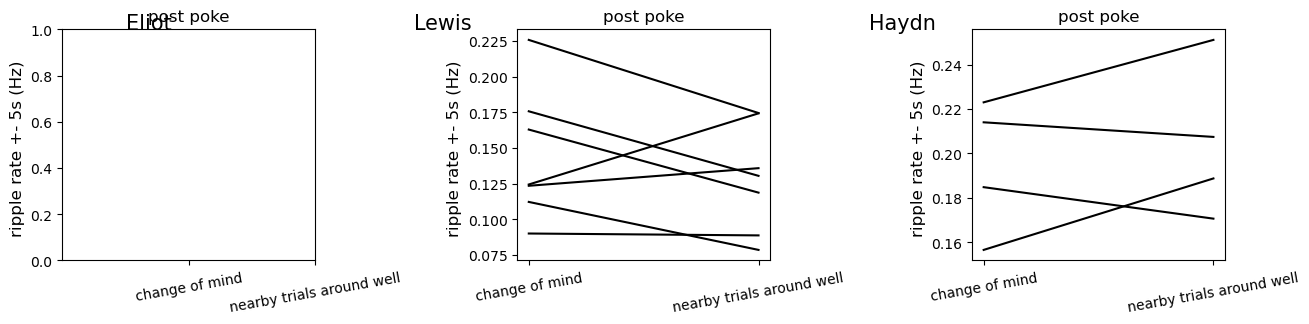

In [528]:
plot_ripple_rate(ranges,ranges_nearby,ripple_ind,ripple_ind_nearby)

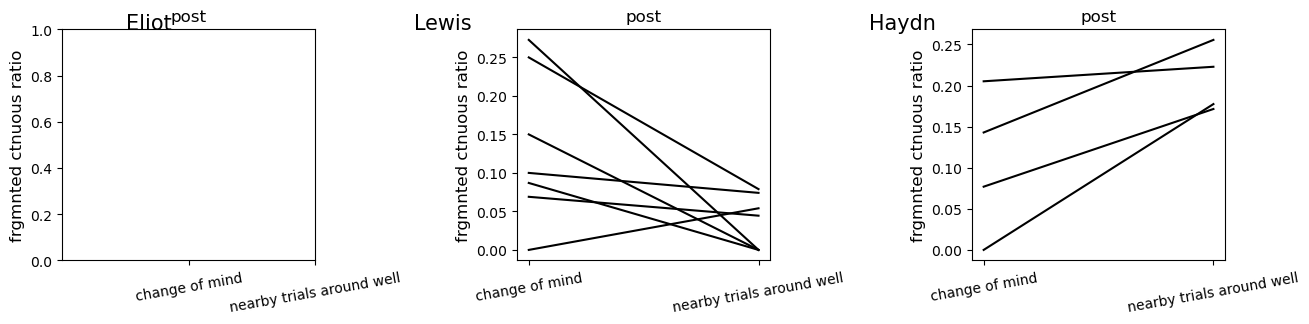

In [529]:
plot_fragmented_ratio(ranges,ranges_nearby,ripple_ind,ripple_ind_nearby,session_names,session_names_nearby)

In [525]:
%debug

> /tmp/ipykernel_3445674/3725692542.py(47)plot_fragmented_ratio()
     45 
     46             total_time = np.sum(np.diff(ranges[animal][d],axis = 1))
---> 47             rate = total_time_frag / (total_time_cont + total_time_frag)#total_time_frag #/ total_time
     48 
     49             total_time_frag_nearby = 0



ipdb>  total_time_cont


0


ipdb>  total_time


53.70198154449463


ipdb>  len(ripple_ind[animal][d])


0


ipdb>  exit


In [285]:
nwb_copy_file_name = "eliot20221020_.nwb"
session_name = "06_Seq2Session3"
position_name = "pos 5 valid times"
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'

In [310]:
nwb_copy_file_name = "lewis20240109_.nwb"
session_name = "04_Rev2Session2"
position_name = "pos 3 valid times"
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode_threshold_method = "MUA_0SD"

In [311]:
# 1. load session's linear position info
print('currently investigating:')
print(session_name)
print(position_name)
animal = nwb_copy_file_name[:5]

linear_position_info=(IntervalLinearizedPosition() & {
            'nwb_file_name':nwb_copy_file_name,
            'interval_list_name':position_name,
            'position_info_param_name':'default_decoding'}).fetch1_dataframe()

position_info = (IntervalPositionInfo() & {
            'nwb_file_name':nwb_copy_file_name,
            'interval_list_name':position_name,
            'position_info_param_name':'default_decoding'}).fetch1_dataframe()
    
# 3. load ripples
key = {"nwb_file_name": nwb_copy_file_name, "interval_list_name":session_name,
      "encoding_set":encoding_set,"classifier_param_name":classifier_param_name,
      "decode_threshold_method":decode_threshold_method}
           #"encoding_set":encoding_set,"classifier_param_name":classifier_param_name}
log_df_replay_query = (NotExtendedTrialChoiceReplay() & key).fetch1("choice_reward_replay")
if type(log_df_replay_query) is dict:
    log_df_replay = pd.DataFrame(log_df_replay_query)
else:
    log_df_replay = pd.read_pickle(log_df_replay_query)

key = {"nwb_file_name": nwb_copy_file_name, "interval_list_name":session_name,
      "encoding_set":encoding_set,"classifier_param_name":classifier_param_name}
           #"encoding_set":encoding_set,"classifier_param_name":classifier_param_name}
ripple_times_query = (RippleTimesWithDecode() & key).fetch1("ripple_times")

if type(ripple_times_query) is dict:
    ripple_times = pd.DataFrame(ripple_times_query)
else:
    ripple_times = pd.read_pickle(ripple_times_query)
        
    # 4. find return time
rowID, trials, proportions, turnaround_times = find_trials(log_df_replay,
                                                            linear_position_info,
                                                            position_info,
                                                            proportion_threshold = 0)

[10:12:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


In [312]:
rowID

[6,
 9,
 11,
 13,
 14,
 22,
 28,
 29,
 33,
 39,
 41,
 43,
 44,
 45,
 47,
 53,
 58,
 62,
 63,
 66,
 76]

In [313]:
for ind in range(len(rowID)):
    trialID = rowID[ind]
    ripple_ID_O = log_df_replay.loc[trialID,"replay_O"]
    if trialID < len(log_df_replay) - 2:
        ripple_ID_H = log_df_replay.loc[trialID + 1,"replay_H"]
    else:
        ripple_ID_H = []
    
    if len(ripple_ID_O) > 0 or len(ripple_ID_H) > 0:
        print(trialID)
        print("Outer:", ripple_ID_O)
        print("Home t:", log_df_replay.loc[trialID,"replay_H"])
        print("Home t + 1:", ripple_ID_H)
        print("current:",str(log_df_replay.loc[trialID,"current"]),"past:",str(log_df_replay.loc[trialID,"past"]),
             "past reward:",str(log_df_replay.loc[trialID,"past_reward"]))
        print("change of mind arms",str(np.unique(trials[ind]) - 5))
    
        


9
Outer: [[[3]], [[3]]]
Home t: [[[0]]]
Home t + 1: [[[0]], [[0]], [[], []], [[0]]]
current: 3.0 past: 1.0 past reward: 4.0
change of mind arms [ 2.  3. nan]
11
Outer: [[[2]], [[2]], []]
Home t: [[[0]]]
Home t + 1: []
current: 2.0 past: 1.0 past reward: 1.0
change of mind arms [ 2.  3. nan]
13
Outer: [[[3]], [[]], [[3]]]
Home t: [[[0]], [], [[2], [0]], [[0]]]
Home t + 1: [[[]]]
current: 3.0 past: 4.0 past reward: 4.0
change of mind arms [ 1.  2.  3. nan]
14
Outer: [[[1]], [], [[1]], [[1]]]
Home t: [[[]]]
Home t + 1: [[[0]], [[0]], [[]]]
current: 1.0 past: 3.0 past reward: 3.0
change of mind arms [ 1.  2. nan]
22
Outer: []
Home t: [[[], [3], []]]
Home t + 1: [[[0]], [[0]]]
current: 3.0 past: 1.0 past reward: 1.0
change of mind arms [ 2.  3. nan]
33
Outer: [[[1]], [[]]]
Home t: []
Home t + 1: [[], [[0], [2]]]
current: 1.0 past: 2.0 past reward: 3.0
change of mind arms [ 1.  4. nan]
41
Outer: [[[4]], [[4]]]
Home t: [[[0]]]
Home t + 1: [[[]]]
current: 4.0 past: 1.0 past reward: 1.0
change 

In [262]:
log_df_replay

,timestamp_H,Home,timestamp_O,OuterWellIndex,rewardNum,ripple_H,ripple_O,replay_H,replay_O,ripple_ID_H,ripple_ID_O,current,future_H,future_O,past,past_reward
1,1.666287e+09,1.0,1.666287e+09,2.0,1.0,[],"[[[1666286777.342576, 1666286777.496576]], [[1...",[],"[[[2]], [[2]]]",[],"[1, 2]",2.0,2.0,4.0,NaN,NaN
2,1.666287e+09,1.0,1.666287e+09,4.0,1.0,"[[[1666286788.59457, 1666286788.67857]], [[166...",[],"[[[0]], [[0], []], [[0]], [[0]], [[3]], [[0]],...",[],"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[],4.0,4.0,3.0,2.0,NaN
3,1.666287e+09,1.0,1.666287e+09,3.0,2.0,"[[[1666286828.522549, 1666286828.6265483]], [[...","[[[1666286846.722539, 1666286846.774539]], [[1...","[[[0]], [[0, 3]], [[]], [[1], [2]], [[1]], [[3...","[[[3]], [[2]], [[3]]]","[14, 15, 16, 17, 18, 19]","[20, 21, 22]",3.0,3.0,1.0,4.0,NaN
4,1.666287e+09,1.0,1.666287e+09,1.0,1.0,"[[[1666286866.876528, 1666286866.948528], [166...",[],"[[[0], [4]], [[1], [0], []], [[3], [4], [3]]]",[],"[23, 24, 25]",[],1.0,1.0,2.0,3.0,3.0
5,1.666287e+09,1.0,1.666287e+09,2.0,1.0,"[[[1666286890.5285156, 1666286890.6885154], [1...","[[[1666286905.6045074, 1666286905.9805071]]]","[[[2], [0]], [[4], [3]]]",[[[2]]],"[26, 27]",[28],2.0,2.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1.666289e+09,1.0,1.666289e+09,1.0,1.0,[],[],[],[],[],[],1.0,1.0,4.0,1.0,1.0
79,NaN,NaN,1.666289e+09,4.0,0.0,[],[],[],[],[],[],4.0,4.0,2.0,1.0,1.0
80,1.666289e+09,1.0,1.666289e+09,2.0,1.0,[],[],[],[],[],[],2.0,2.0,1.0,4.0,1.0
81,1.666289e+09,1.0,1.666289e+09,1.0,1.0,[],[],[],[],[],[],1.0,1.0,NaN,2.0,1.0


In [255]:
ripple_times

,start_time,end_time,animal_location,trial_number,cont_intvl,frag_intvl,cont_intvl_replay,duration,mean_zscore,median_zscore,max_zscore,min_zscore,speed_at_start,speed_at_end,max_speed,min_speed,median_speed,mean_speed
1,1.666287e+09,1.666287e+09,well2,1,"[[1666286777.342576, 1666286777.496576]]",[],[[2]],0.157,1.436174,1.264370,3.853803,0.027286,0.188217,0.778263,0.778263,0.188217,0.507914,0.483360
2,1.666287e+09,1.666287e+09,well2,1,"[[1666286781.1085742, 1666286781.302574]]",[],[[2]],0.196,1.030896,0.971785,2.655071,0.049126,3.986570,3.981611,3.986570,1.836469,2.888426,2.848205
3,1.666287e+09,1.666287e+09,home,2,"[[1666286788.59457, 1666286788.67857]]",[],[[0]],0.087,1.087506,0.754738,2.389650,0.009743,0.039423,0.039424,0.039424,0.039423,0.039424,0.039424
4,1.666287e+09,1.666287e+09,home,2,"[[1666286788.95657, 1666286789.0805695], [1666...","[[1666286789.0965698, 1666286789.1505697]]","[[0], []]",0.225,1.637833,1.314864,4.951594,-0.567113,0.039424,0.039424,0.039424,0.039424,0.039424,0.039424
5,1.666287e+09,1.666287e+09,home,2,"[[1666286791.5805683, 1666286791.6985683]]",[],[[0]],0.120,1.213863,1.294940,2.940340,-0.429990,0.039423,0.039424,0.039424,0.039423,0.039423,0.039423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1.666289e+09,1.666289e+09,home,76,"[[1666288664.487566, 1666288664.561566], [1666...","[[1666288664.563566, 1666288664.709566]]","[[0], [0]]",0.271,4.020112,2.069396,20.853014,-0.334657,0.590922,0.590922,0.590923,0.590920,0.590922,0.590921
178,1.666289e+09,1.666289e+09,home,76,"[[1666288665.0235658, 1666288665.0715656]]","[[1666288664.9175658, 1666288664.9735658], [16...",[[0]],0.216,4.569288,3.776522,14.201003,-0.468209,0.590921,0.590920,0.590922,0.590920,0.590921,0.590921
179,1.666289e+09,1.666289e+09,home,77,"[[1666288684.7555552, 1666288685.021555]]",[],[[2]],0.277,3.798608,1.799280,13.766790,-0.280039,0.102267,0.102267,0.102267,0.102267,0.102267,0.102267
180,1.666289e+09,1.666289e+09,home,77,"[[1666288686.4815545, 1666288686.675554]]",[],[[1]],0.196,3.215441,1.252197,13.516806,-0.713228,0.102268,0.102267,0.102268,0.102267,0.102267,0.102267


In [284]:
NotExtendedTrialChoiceReplay() & {"nwb_file_name":"lewis20240110_.nwb"}

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,classifier_param_name a name for this set of parameters,encoding_set a name for this set of encoding,decode_threshold_method a name for this thresholding method,"choice_reward_replay pandas dataframe, choice, reward, ripple time, replays"
lewis20240110_.nwb,02_Rev2Session1,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_0SD,=BLOB=
lewis20240110_.nwb,02_Rev2Session1,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_M05SD,=BLOB=
lewis20240110_.nwb,04_Rev2Session2,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_0SD,=BLOB=
lewis20240110_.nwb,04_Rev2Session2,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_M05SD,=BLOB=
lewis20240110_.nwb,06_Rev2Session3,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_0SD,=BLOB=
lewis20240110_.nwb,06_Rev2Session3,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_M05SD,=BLOB=
lewis20240110_.nwb,08_Rev2Session4,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_0SD,=BLOB=
lewis20240110_.nwb,08_Rev2Session4,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_M05SD,=BLOB=
lewis20240110_.nwb,10_Rev2Session5,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_0SD,=BLOB=
lewis20240110_.nwb,10_Rev2Session5,default_decoding_gpu_4armMaze,2Dheadspeed_above_4,MUA_M05SD,=BLOB=


In [231]:
ripple_times

,start_time,end_time,animal_location,trial_number,cont_intvl,frag_intvl,cont_intvl_replay,duration,mean_zscore,median_zscore,max_zscore,min_zscore,max_speed,min_speed,median_speed,mean_speed
1,1.666389e+09,1.666389e+09,home,3,"[[1666389078.9726658, 1666389079.0526657], [16...","[[1666389079.0546658, 1666389079.1006656], [16...","[[], [], []]",0.517,1.625883,0.427890,18.489112,-1.025121,0.783200,0.137251,0.560050,0.516341
2,1.666389e+09,1.666389e+09,home,3,"[[1666389081.4946644, 1666389081.6286645], [16...","[[1666389081.6306643, 1666389081.6566644], [16...","[[], [4], [1]]",0.404,0.516166,0.412373,3.358644,-0.593689,1.815920,0.336376,0.692905,0.843766
3,1.666389e+09,1.666389e+09,home,4,"[[1666389108.32065, 1666389108.41465], [166638...","[[1666389108.45065, 1666389108.48665]]","[[], [4]]",0.357,0.577559,0.322238,3.335661,-1.156682,0.573963,0.050036,0.366529,0.308473
4,1.666389e+09,1.666389e+09,home,4,"[[1666389110.8066487, 1666389110.9486487], [16...","[[1666389111.1206486, 1666389111.1526487], [16...","[[3], [2], [], [], [3]]",0.681,1.186140,0.155339,21.121504,-1.094011,0.415776,0.415767,0.415776,0.415775
5,1.666389e+09,1.666389e+09,home,4,"[[1666389114.6106467, 1666389114.9986465]]",[],[[2]],0.389,0.910191,0.758927,4.402172,-0.919045,0.415776,0.415769,0.415776,0.415775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1.666391e+09,1.666391e+09,home,76,"[[1666390768.8797646, 1666390768.9617646], [16...","[[1666390768.9637644, 1666390769.0837646], [16...","[[4], [2]]",0.437,1.290210,0.581482,11.710450,-1.080856,0.117082,0.117082,0.117082,0.117082
118,1.666391e+09,1.666391e+09,home,76,"[[1666390771.3817632, 1666390771.4877632], [16...",[],"[[], [0]]",0.262,0.331382,0.073065,3.607132,-0.875739,0.117083,0.117044,0.117082,0.117079
119,1.666391e+09,1.666391e+09,home,77,"[[1666390796.5117495, 1666390796.8397496]]",[],[[0]],0.330,0.370053,0.056070,5.000926,-1.059187,0.799192,0.799178,0.799187,0.799186
120,1.666391e+09,1.666391e+09,well3,78,"[[1666390841.501726, 1666390841.663726], [1666...","[[1666390841.6657257, 1666390841.7257257]]","[[1], [1]]",0.321,0.353752,0.045782,3.950953,-1.226738,0.326260,0.079487,0.213670,0.211069


In [141]:
#%debug

> /home/shijiegu/anaconda3/envs/spyglass/lib/python3.9/site-packages/pandas/core/indexes/base.py(5385)__getitem__()
   5383             # GH#44051 exclude bool, which would return a 2d ndarray
   5384             key = com.cast_scalar_indexer(key)
-> 5385             return getitem(key)
   5386 
   5387         if isinstance(key, slice):



ipdb>  u


> /home/shijiegu/Documents/spyglass/src/spyglass/shijiegu/changeOfMindRipple.py(88)restrict_time()
     86     trialPosInfo = trialPosInfo.loc[trialInd,:]
     87 
---> 88     actual_range = (trialPosInfo.index[0], trialPosInfo.index[-1])
     89 
     90     return actual_range



ipdb>  trialPosInfo


Empty DataFrame
Columns: [linear_position, track_segment_id, projected_x_position, projected_y_position]
Index: []


ipdb>  start


1666127440.9997869


ipdb>  end


1666127451.7008123


ipdb>  trialInd = (linear_position_info.index >= start) & (linear_position_info.index <= end)     trialPosInfo = linear_position_info.loc[trialInd,:]


*** SyntaxError: invalid syntax


ipdb>  trialPosInfo = linear_position_info.loc[trialInd,:]


*** IndexError: Boolean index has wrong length: 456 instead of 1041448


ipdb>  trialInd = (linear_position_info.index >= start) & (linear_position_info.index <= end)
ipdb>  trialPosInfo = linear_position_info.loc[trialInd,:]
ipdb>  len(trialPosInfo)


5351


ipdb>  trialPosInfo = trialPosInfo.loc[trialPosInfo.index > home_last_segments[0][-1],:]
ipdb>  len(trialPosInfo)


1337


ipdb>  np.array(trialPosInfo.track_segment_id)


array([1, 1, 1, ..., 6, 6, 6])


ipdb>  np.unique(np.array(trialPosInfo.track_segment_id))


array([1, 6])


ipdb>  exit


In [4]:
# for a single session first

In [92]:
nwb_file_name = 'eliot20221022.nwb'
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'

In [93]:
animal = nwb_file_name[:5]
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)
session_interval, position_interval = runSessionNames(nwb_copy_file_name)
print(session_interval)
print(position_interval)

['02_Seq2Session1', '04_Seq2Session2', '06_Seq2Session3', '08_Seq2Session4', '10_Seq2Session5']
['pos 1 valid times', 'pos 3 valid times', 'pos 5 valid times', 'pos 7 valid times', 'pos 9 valid times']


In [125]:
# need to input
ind = 2

In [126]:
session_name = session_interval[ind]
position_name = position_interval[ind]

In [127]:
ripple_nums, ripple_nums_nearby  = triggered_ripple_session(nwb_copy_file_name,session_name,position_name,
                                       encoding_set,classifier_param_name)

[20:59:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


In [128]:
ripple_nums

[]

In [129]:
ripple_nums_nearby

[]

In [115]:
log_df

,timestamp_H,Home,timestamp_O,OuterWellIndex,rewardNum,current,future_H,future_O,past,past_reward
1,1.666389e+09,1.0,1.666389e+09,1.0,1.0,1.0,1.0,4.0,NaN,NaN
2,1.666389e+09,1.0,1.666389e+09,4.0,1.0,4.0,4.0,3.0,1.0,NaN
3,1.666389e+09,1.0,1.666389e+09,3.0,2.0,3.0,3.0,2.0,4.0,NaN
4,1.666389e+09,1.0,1.666389e+09,2.0,1.0,2.0,2.0,4.0,3.0,3.0
5,1.666389e+09,1.0,1.666389e+09,4.0,2.0,4.0,4.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
78,1.666391e+09,1.0,1.666391e+09,3.0,2.0,3.0,3.0,4.0,4.0,1.0
79,1.666391e+09,1.0,1.666391e+09,4.0,2.0,4.0,4.0,1.0,3.0,3.0
80,1.666391e+09,1.0,1.666391e+09,1.0,1.0,1.0,1.0,2.0,4.0,4.0
81,1.666391e+09,1.0,1.666391e+09,2.0,2.0,2.0,2.0,NaN,1.0,4.0


In [11]:
linear_position_info=(IntervalLinearizedPosition() & {
            'nwb_file_name':nwb_copy_file_name,
            'interval_list_name':position_name,
            'position_info_param_name':'default_decoding'}).fetch1_dataframe()

position_info = (IntervalPositionInfo() & {
            'nwb_file_name':nwb_copy_file_name,
            'interval_list_name':position_name,
            'position_info_param_name':'default_decoding'}).fetch1_dataframe()

# 2. load stateScript
key={'nwb_file_name':nwb_copy_file_name,'epoch':int(session_name[:2])}
log=(TrialChoice & key).fetch1('choice_reward')
log_df=pd.DataFrame(log)

[18:29:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


In [16]:
# 3. load ripple times

In [30]:
key = {"nwb_file_name": nwb_copy_file_name, "interval_list_name":session_name,
       "encoding_set":encoding_set,"classifier_param_name":classifier_param_name}
ripple_times_query = (RippleTimesWithDecode() & key).fetch1("ripple_times")

if type(ripple_times_query) is dict:
    ripple_times = pd.DataFrame(ripple_times_query)
else:
    ripple_times = pd.read_pickle(ripple_times_query)

In [12]:
# find return time
rowID, trials, proportions, turnaround_times = find_trials(log_df,
                                                            linear_position_info,
                                                            position_info,
                                                            proportion_threshold = 0.1)

In [14]:
rowID

[29, 33, 38, 39, 47, 53, 68, 72, 78]

In [33]:
ind = 0

In [34]:
# load ripple ripples

In [35]:
trial = rowID[ind]
t0 = turnaround_times[ind][0]


In [74]:
# loop through the ripple_times table
ripple_ind = [] #this list tallies ripple near turn around time
for r_ind in ripple_times.index:
    start_time = ripple_times.loc[r_ind].start_time	
    end_time = ripple_times.loc[r_ind].end_time
    start_condition = start_time >= actual_range[0] and start_time <= actual_range[-1]
    end_condition = end_time >= actual_range[0] and end_time <= actual_range[-1]
    if start_condition & end_condition:
        ripple_ind.append(r_ind)

In [75]:
ripple_ind 

[]

In [8]:
# load session's linear position info
session_name = session_interval[ind]
position_name = position_interval[ind]
print('currently investigating:')
print(session_name)
print(position_name)

linear_position_info=(IntervalLinearizedPosition() & {
    'nwb_file_name':nwb_copy_file_name,
    'interval_list_name':position_name,
    'position_info_param_name':'default_decoding'}).fetch1_dataframe()

position_info = (IntervalPositionInfo() & {
            'nwb_file_name':nwb_copy_file_name,
            'interval_list_name':position_name,
            'position_info_param_name':'default_decoding'}).fetch1_dataframe()

camera_frequency = 1/stats.mode(np.diff(linear_position_info.index))[0]
linear_position_info

[20:39:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


,linear_position,track_segment_id,projected_x_position,projected_y_position
time,,,,
1.666389e+09,NaN,0,NaN,NaN
1.666389e+09,NaN,0,NaN,NaN
1.666389e+09,NaN,0,NaN,NaN
1.666389e+09,NaN,0,NaN,NaN
1.666389e+09,NaN,0,NaN,NaN
...,...,...,...,...
1.666391e+09,418.29228,7,186.0,54.5
1.666391e+09,418.29228,7,186.0,54.5
1.666391e+09,418.29228,7,186.0,54.5


In [9]:
# load stateScript
key={'nwb_file_name':nwb_copy_file_name,'epoch':int(session_name[:2])}
log=(TrialChoice & key).fetch1('choice_reward')
log_df=pd.DataFrame(log)

In [192]:
rowID, trials, proportions, turnaround_times = find_trials(log_df, linear_position_info, position_info)

In [234]:
rowID

[11, 29, 32, 33, 35, 38, 39, 40, 46, 47, 53, 68, 72, 78]

In [235]:
turnaround_times

[[],
 [1666389670.7343502, 1666389672.5703492],
 [],
 [1666389783.3882902],
 [],
 [1666389896.5142298, 1666389912.4022212],
 [1666389934.4782095],
 [],
 [],
 [1666390106.452118],
 [1666390239.4360468, 1666390244.0040445, 1666390248.660042],
 [1666390610.2878492],
 [1666390700.609801],
 [1666390818.1377382, 1666390823.8537352, 1666390820.393737]]

In [236]:
rowID = [29]

In [238]:
turnaround_times=[[1666389670.7343502, 1666389672.5703492]]

In [297]:
graph = TrackGraph() & {'track_graph_name': '4 arm lumped 2023'}

[09:37:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:37:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [303]:
linear_map,welllocations = get_linearization_map(track_graph_name='4 arm lumped 2023')
region={}
region[6] = linear_map[3]
region[7] = linear_map[5]
region[8] = linear_map[7]
region[9] = linear_map[9]

[09:42:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:42:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:42:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [306]:
def select_subset_helper_position(xr_ob,region):
    xr_ob=xr_ob.sel(
        position=xr_ob.position[
            np.logical_and(xr_ob.position>=region[0],xr_ob.position<=region[1])])
    return xr_ob

[09:44:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:44:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [305]:
region[6]

array([165.66041604, 252.64353221])

In [307]:
posterior_position_subset_arm = select_subset_helper_position(posterior_position_subset,region[6])

In [308]:
posterior_position_subset_arm

<xarray.DataArray 'causal_posterior' (time: 576, position: 44)>
array([[5.5167900e-04, 5.5499410e-04, 5.5687764e-04, ..., 4.1220125e-04,
        2.9849727e-04, 2.4898406e-04],
       [5.6664791e-04, 5.6133571e-04, 5.5914861e-04, ..., 6.6354731e-04,
        6.6782907e-04, 6.6788920e-04],
       [1.2852348e-04, 1.2338664e-04, 1.1062258e-04, ..., 1.3104281e-05,
        7.3131373e-06, 4.7151680e-06],
       ...,
       [4.8948149e-04, 4.7431936e-04, 4.5542052e-04, ..., 3.9059581e-04,
        3.1710439e-04, 2.8413339e-04],
       [4.4257904e-04, 4.3871879e-04, 4.3720473e-04, ..., 5.3890212e-04,
        5.4230436e-04, 5.4054678e-04],
       [4.8232984e-04, 4.7815085e-04, 4.7667240e-04, ..., 5.9511757e-04,
        5.9969281e-04, 5.9535058e-04]], dtype=float32)
Coordinates:
  * time      (time) float64 1.666e+09 1.666e+09 ... 1.666e+09 1.666e+09
  * position  (position) float64 166.6 168.6 170.6 172.6 ... 247.7 249.7 251.7

In [ ]:
posterior_position_subset

In [296]:
posterior_position_subset

<xarray.DataArray 'causal_posterior' (time: 576, position: 301)>
array([[4.8389597e-04, 4.8074959e-04, 4.6298766e-04, ..., 4.4932432e-04,
        4.3068483e-04, 4.1974059e-04],
       [6.4671622e-04, 6.4243213e-04, 6.2004424e-04, ..., 6.1973475e-04,
        6.4509199e-04, 6.5078837e-04],
       [2.1510024e-04, 2.0337354e-04, 1.7851134e-04, ..., 5.9704325e-05,
        5.7155179e-05, 5.1393687e-05],
       ...,
       [4.7329720e-04, 4.7242746e-04, 4.6113445e-04, ..., 4.0395875e-04,
        4.0871644e-04, 4.1056570e-04],
       [5.2335346e-04, 5.2160828e-04, 5.0350715e-04, ..., 4.9326249e-04,
        5.1339163e-04, 5.1847170e-04],
       [5.7318923e-04, 5.7317159e-04, 5.5300869e-04, ..., 5.4143788e-04,
        5.6395051e-04, 5.6778686e-04]], dtype=float32)
Coordinates:
  * time      (time) float64 1.666e+09 1.666e+09 ... 1.666e+09 1.666e+09
  * position  (position) float64 0.9938 2.981 4.969 6.956 ... 738.1 740.1 742.0

In [309]:
triggered_positions = []
triggered_positions_abs = [] #absolute time

for trial_ind in range(len(rowID)):
    trial = rowID[trial_ind]
    ts = turnaround_times[trial_ind]
    for t in ts:
        triggered_position, triggered_position_abs = turnaround_triggered_position(t,linear_position_info,0.5)
        triggered_positions.append(triggered_position)
        triggered_positions_abs.append(triggered_position_abs)

[09:49:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:49:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [310]:
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
decode = load_decode(nwb_copy_file_name,session_name,classifier_param_name,encoding_set)

In [316]:
triggered_decodes = []
triggered_decodes_abs = [] #absolute time
for ind in range(len(triggered_positions)):
    triggered_position = triggered_positions[ind]
    triggered_position_abs = triggered_positions_abs[ind]
    triggered_decode, triggered_decode_abs = turnaround_triggered_decode(t,triggered_position,
                                                                         triggered_position_abs,decode,linear_position_info,
                                                                         max_flag = 0,segment_only = True)
    triggered_decodes.append(triggered_decode)
    triggered_decodes_abs.append(triggered_decode_abs)

[09:52:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:52:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


In [314]:
%debug

> /home/shijiegu/Documents/spyglass/src/spyglass/shijiegu/changeOfMind_triggered.py(101)turnaround_triggered_decode()
     99         subset_linear = linear_position_info.loc[subset_ind]
    100         subset_arm = np.unique(subset_linear.track_segment_id)
--> 101         posterior_position_subset = select_subset_helper_position(posterior_position_subset,region[subset_arm])
    102 
    103     # get max posterior



ipdb>  subset_arm


array([6])


ipdb>  region[subset_arm]


*** TypeError: unhashable type: 'numpy.ndarray'


ipdb>  region


{6: array([165.66041604, 252.64353221]), 7: array([331.10211383, 418.29227956]), 8: array([496.49241045, 583.18763812]), 9: array([657.72023142, 743.03215907])}


ipdb>  region[int(subset_arm)]


array([165.66041604, 252.64353221])


ipdb>  exit


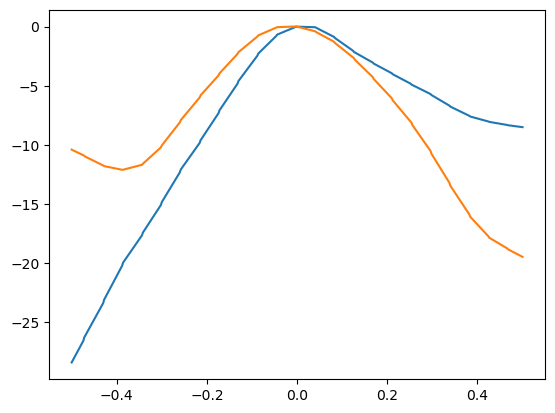

In [317]:
for triggered_position in triggered_positions:
    plt.plot(triggered_position)

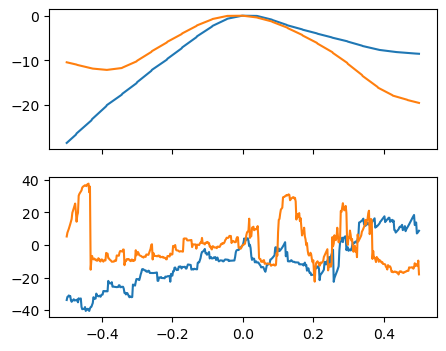

In [318]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4),sharex=True)

for triggered_position in triggered_positions:
    ax1.plot(triggered_position)
    
for triggered_decode in triggered_decodes:
    ax2.plot(triggered_decode)

In [233]:
position_axis

array([  0.99377522,   2.98132565,   4.96887608,   6.95642651,
         8.94397694,  10.93152737,  12.91907781,  14.90662824,
        16.89417867,  18.8817291 ,  20.86927953,  22.85682996,
        24.8443804 ,  26.83193083,  28.81948126,  30.80703169,
        32.79458212,  34.78213255,  36.76968298,  38.75723342,
        40.74478385,  42.73233428,  44.71988471,  46.70743514,
        48.69498557,  50.68253601,  52.67008644,  54.65763687,
        56.6451873 ,  58.63258948,  60.61984342,  62.60709735,
        64.59435129,  66.58160522,  68.56885916,  70.55611309,
        72.54336703,  74.53062096,  76.5178749 ,  78.50512883,
        80.49238276,  82.4796367 ,  84.46689063,  86.45414457,
        88.4413985 ,  90.42865244, 111.42227941, 132.37333876,
       134.27545746, 136.17757616, 138.07969486, 139.98181356,
       141.88393226, 143.78605097, 145.68816967, 147.59028837,
       149.49240707, 151.39452577, 153.29664448, 155.19876318,
       157.10088188, 159.00300058, 160.90511928, 162.80

### for many sessions/day

In [325]:
animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

In [319]:
animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

In [329]:
animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

In [279]:
from spyglass.shijiegu.changeOfMind_triggered import find_triggered_animal

In [330]:
(triggered_positions, triggered_positions_abs,
 triggered_decodes, triggered_decodes_abs) = find_triggered_animal(animal,dates_to_plot,max_flag = 0, segment_only = True)

[10:49:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[10:49:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[10:49:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[10:49:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[10:49:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


Text(0, 0.5, 'linearized location (cm)')

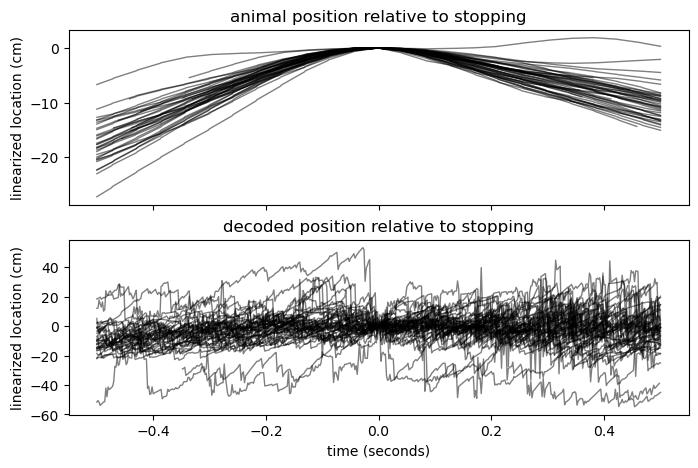

In [331]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5),sharex=True)

for triggered_position in triggered_positions:
    ax1.plot(triggered_position, linewidth = 1, alpha = 0.5, color = 'k')
    
for triggered_decode in triggered_decodes:
    ax2.plot(triggered_decode, linewidth = 1, alpha = 0.5, color = 'k')

ax1.set_title("animal position relative to stopping")
ax2.set_title("decoded position relative to stopping")

ax1.set_ylabel("linearized location (cm)")
ax2.set_xlabel("time (seconds)")
ax2.set_ylabel("linearized location (cm)")

Text(0.5, 0, 'time (seconds)')

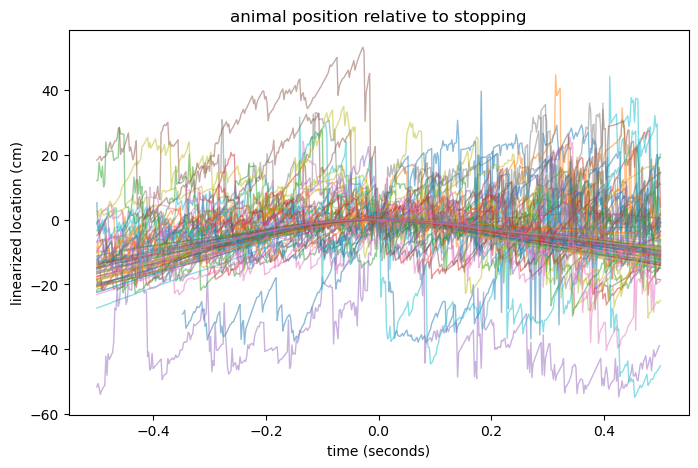

In [332]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5),sharex=True)

for ind in range(len(triggered_positions)):
    ax1.plot(triggered_positions[ind], linewidth = 1, alpha = 0.5, color = 'C'+str(ind))
    ax1.plot(triggered_decodes[ind], linewidth = 1, alpha = 0.5, color = 'C'+str(ind))
    

ax1.set_title("animal position relative to stopping")
#ax2.set_title("decoded position relative to stopping")

ax1.set_ylabel("linearized location (cm)")
ax1.set_xlabel("time (seconds)")
#ax2.set_ylabel("linearized location (cm)")

In [260]:
%debug

> /home/shijiegu/anaconda3/envs/spyglass/lib/python3.9/site-packages/IPython/core/compilerop.py(86)ast_parse()
     84         Arguments are exactly the same as ast.parse (in the standard library),
     85         and are passed to the built-in compile function."""
---> 86         return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
     87 
     88     def reset_compiler_flags(self):



ipdb>  exit


In [4]:
animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221018','20221019','20221020','20221021','20221022']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

In [110]:
animal = 'Haydn'
dates_to_plot = ['20230603','20230604','20230605','20230606','20230607','20230608']
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

In [120]:
animal = 'Molly'
dates_to_plot = ['20220415','20220416','20220417','20220418','20220419','20220420']
datafolder = f'/stelmo/shijie/behavior_pilot/Batch1/{animal}'

In [ ]:
trials_days = find_trials_animal(animal,dates_to_plot,plot = True)

[11:26:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times
epoch name 02_Rev2Session1
epoch_pos_name pos 1 valid times


[2024-12-10 11:26:36,137][WARNING]: Skipped checksum for file with hash: 00b39505-83f8-0b5c-2a8c-ef158f7d6090, and path: /stelmo/nwb/analysis/lewis20240106/lewis20240106_NVYBEM95P0.nwb
